# Projeto: SmartBackorder: Análise e Predição de BackOrders de Produtos

#### Etapa 01: Conhecer, Preparar e Limpar os Dados (análise preliminar de Features)
- BackOrders_Etapa01_Cleaning-Data-Train.ipynb
- BackOrders_Etapa01_Cleaning-Data-Test.ipynb

#### Etapa 02: Análise mais detalhada de Features
- BackOrders_Etapa02_EDA-Trend-Analysis-Train.ipynb
- BackOrders_Etapa02_EDA-Trend-Analysis-Test.ipynb

#### Etapa 03: Geração de Modelos e Avaliação dos Resultados
- BackOrders_Etapa03_Model-Fit-Validation.ipynb

#### Etapa 04: Tuning/Calibração de Modelos e Reavaliação dos Resultados
- BackOrders_Etapa04_TuningGradientBoostingModel.ipynb

### Etapa 02: Análise mais detalhada de Features

Etapa 2 - Objetivos:
- Relacionamento entre as Features
- Análise de Tendências
- Questionamento sobre os dados

### Observação sobre a Etapa 02:
#### Exploratory Data Analysis (EDA) / Análise Exploratória de Dados (AED)
- https://en.wikipedia.org/wiki/Exploratory_data_analysis
- https://pt.wikipedia.org/wiki/An%C3%A1lise_explorat%C3%B3ria_de_dados

"Em estatística, a análise exploratória de dados (AED) é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais. 

Um modelo estatístico pode ou não ser usado, mas primariamente a AED tem como objetivo observar o que os dados podem nos dizer além da modelagem formal ou do processo de teste de hipóteses. (Wikipédia - vide links acima)"


Nesta Etapa 03 faremos alguns exercícios de análise exploratória, mais com o objetivo didático do que especificamente "dissecar" o Dataset. 

Tal proposta se justifica basicamente por dois motivos:

1. Ausência de domínio das inúmeras técnicas estatísticas que poderiam ser utilizadas;
2. Ausência de um conhecimento mais aprofundado na área de negócio, que seria suprida pela presença do Analista de Negócios Especialista, em uma equipe multidisciplinar.

# Conteúdo do Dataset
#### (relembrando). 

As colunas são definidas da seguinte forma:
- sku - Random ID for the product (chave de identificação de produto)
- national_inv - Current inventory level for the part (estoque atual)
- lead_time - Transit time for product (if available) (tempo de tranporte do fornecedor)
- in_transit_qty - Amount of product in transit from source (quantidade em transporte no momento)
- forecast_3_month - Forecast sales for the next 3 months (previsão de vendas - próximos 3 meses)
- forecast_6_month - Forecast sales for the next 6 months (previsão de vendas - próximos 6 meses)
- forecast_9_month - Forecast sales for the next 9 months (previsão de vendas - próximos 9 meses)
- sales_1_month - Sales quantity for the prior 1 month time period (quantidade vendida - último mês)
- sales_3_month - Sales quantity for the prior 3 month time period (quantidade vendida - últimos 3 meses)
- sales_6_month - Sales quantity for the prior 6 month time period (quantidade vendida - últimos 6 meses)
- sales_9_month - Sales quantity for the prior 9 month time period (quantidade vendida - últimos 6 meses)
- min_bank - Minimum recommend amount to stock (quantidade de estoque mínima recomendada)
- potential_issue - Source issue for part identified (problema de origem para parte identificada)
- pieces_past_due - Parts overdue from source (partes atrasadas da fonte)
- perf_6_month_avg - Source performance for prior 6 month period (desempenho da fonte para o período anterior de 6 meses)
- perf_12_month_avg - Source performance for prior 12 month period (desempenho da fonte para o período anterior de 12 meses)
- local_bo_qty - Amount of stock orders overdue (quantidade de pedidos atrasados)
- deck_risk - Part risk flag (indicativo de risco)
- oe_constraint - Part risk flag (indicativo de risco)
- ppap_risk - Part risk flag (indicativo de risco)
- stop_auto_buy - Part risk flag (indicativo de risco)
- rev_stop - Part risk flag (indicativo de risco)
- went_on_backorder - Product actually went on backorder. This is the target value. (o produto realmente entrou em ordem. Este é o valor alvo.)

In [1]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#...the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
#http://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

In [2]:
#carregando datasets
# treino
#df = pd.read_csv('data/Backorder_Treino_clean.csv')
# teste
df = pd.read_csv('data/Backorder_Teste_clean.csv')
data_frame = df
data_frame.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,0.999870,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.77934,0.776331,0.0,1,0,0,1,0,0
1,3285131,0.993884,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.77934,0.776331,0.0,0,0,1,0,0,0
2,3285358,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92000,0.950000,0.0,0,0,0,1,0,0
3,3285517,0.976187,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78000,0.750000,0.0,0,0,1,1,0,0
4,3285608,1.000000,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54000,0.710000,0.0,0,0,0,1,0,0


In [3]:
data_frame.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242070,3526987,0.996546,12.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242071,3526988,0.997054,12.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242072,3526989,0.997054,12.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242073,3526990,0.995037,12.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
242074,3526991,0.999035,12.0,0.0,0.0,0.0,0.0,0.0,0.010289,0.03018,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242075 entries, 0 to 242074
Data columns (total 23 columns):
sku                  242075 non-null int64
national_inv         242075 non-null float64
lead_time            242075 non-null float64
in_transit_qty       242075 non-null float64
forecast_3_month     242075 non-null float64
forecast_6_month     242075 non-null float64
forecast_9_month     242075 non-null float64
sales_1_month        242075 non-null float64
sales_3_month        242075 non-null float64
sales_6_month        242075 non-null float64
sales_9_month        242075 non-null float64
min_bank             242075 non-null float64
potential_issue      242075 non-null int64
pieces_past_due      242075 non-null float64
perf_6_month_avg     242075 non-null float64
perf_12_month_avg    242075 non-null float64
local_bo_qty         242075 non-null float64
deck_risk            242075 non-null int64
oe_constraint        242075 non-null int64
ppap_risk            242075 non-null int64

### Nota: Ao salvar o Dataset ("clean") os campos com as informações de valores foram convertidos de Int para Float.
- "national_inv", "perf_6_month_avg" e "perf_12_month_avg" foram preenchidas na etapa 01. As demais Features não.
- pendência sobre essa mudança nos tipos de dados: verificar, entender e corrigir (se for o caso).

In [5]:
# "sku" (stock keeping unit) é a chave de identificação de produto.
data_frame = data_frame.set_index('sku')
data_frame.tail()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
3526987,0.996546,12.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
3526988,0.997054,12.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
3526989,0.997054,12.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
3526990,0.995037,12.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0
3526991,0.999035,12.0,0.0,0.0,0.0,0.0,0.0,0.010289,0.03018,0.03018,...,0.0,0.48,0.48,0.0,1,0,0,1,0,0


### Analisando Features e Tendências

In [6]:
# Analisando correlações (relembrando)
col_corr = data_frame.corr()
col_corr

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
national_inv,1.000000,0.122642,-0.206290,-0.648967,-0.770214,-0.791963,-0.374660,-0.566425,-0.613109,-0.603754,...,-0.081426,-0.061049,-0.055165,-0.087952,0.157029,-0.010011,-0.001184,0.011100,-0.026573,-0.146191
lead_time,0.122642,1.000000,-0.056020,-0.100913,-0.132548,-0.136985,-0.061302,-0.083231,-0.073532,-0.060399,...,-0.021810,-0.020164,-0.012561,0.001891,0.182930,-0.003415,0.013669,-0.226114,0.001084,-0.021627
in_transit_qty,-0.206290,-0.056020,1.000000,0.048778,0.084804,0.094766,0.053026,0.097033,0.098585,0.087927,...,0.036707,-0.016688,-0.019554,0.017318,0.027054,0.001756,-0.013346,0.021887,-0.000073,-0.012244
forecast_3_month,-0.648967,-0.100913,0.048778,1.000000,0.851265,0.737747,0.118222,0.192172,0.164771,0.144354,...,0.127716,-0.057389,-0.060961,0.081522,0.012479,0.005164,0.032253,-0.057980,-0.007936,0.130701
forecast_6_month,-0.770214,-0.132548,0.084804,0.851265,1.000000,0.925730,0.196138,0.343127,0.342723,0.324022,...,0.101462,0.022331,0.018175,0.062494,-0.090229,0.005178,0.005341,-0.002626,-0.011885,0.127215
forecast_9_month,-0.791963,-0.136985,0.094766,0.737747,0.925730,1.000000,0.239290,0.432967,0.452976,0.434255,...,0.080690,0.066874,0.061890,0.049229,-0.162965,0.006148,-0.014491,0.029573,-0.013664,0.118491
sales_1_month,-0.374660,-0.061302,0.053026,0.118222,0.196138,0.239290,1.000000,0.690962,0.556674,0.500372,...,-0.000010,0.075504,0.070355,0.078194,-0.111087,0.008237,-0.028044,0.023829,-0.006210,0.096601
sales_3_month,-0.566425,-0.083231,0.097033,0.192172,0.343127,0.432967,0.690962,1.000000,0.833968,0.759616,...,0.002179,0.118538,0.113098,0.062087,-0.183895,0.010882,-0.044584,0.029836,-0.008189,0.098993
sales_6_month,-0.613109,-0.073532,0.098585,0.164771,0.342723,0.452976,0.556674,0.833968,1.000000,0.922808,...,-0.001522,0.136538,0.132478,0.040560,-0.229779,0.010791,-0.052521,0.032223,-0.001982,0.077140
sales_9_month,-0.603754,-0.060399,0.087927,0.144354,0.324022,0.434255,0.500372,0.759616,0.922808,1.000000,...,-0.004754,0.142833,0.138878,0.027988,-0.247756,0.013945,-0.055696,0.030533,-0.003976,0.064718


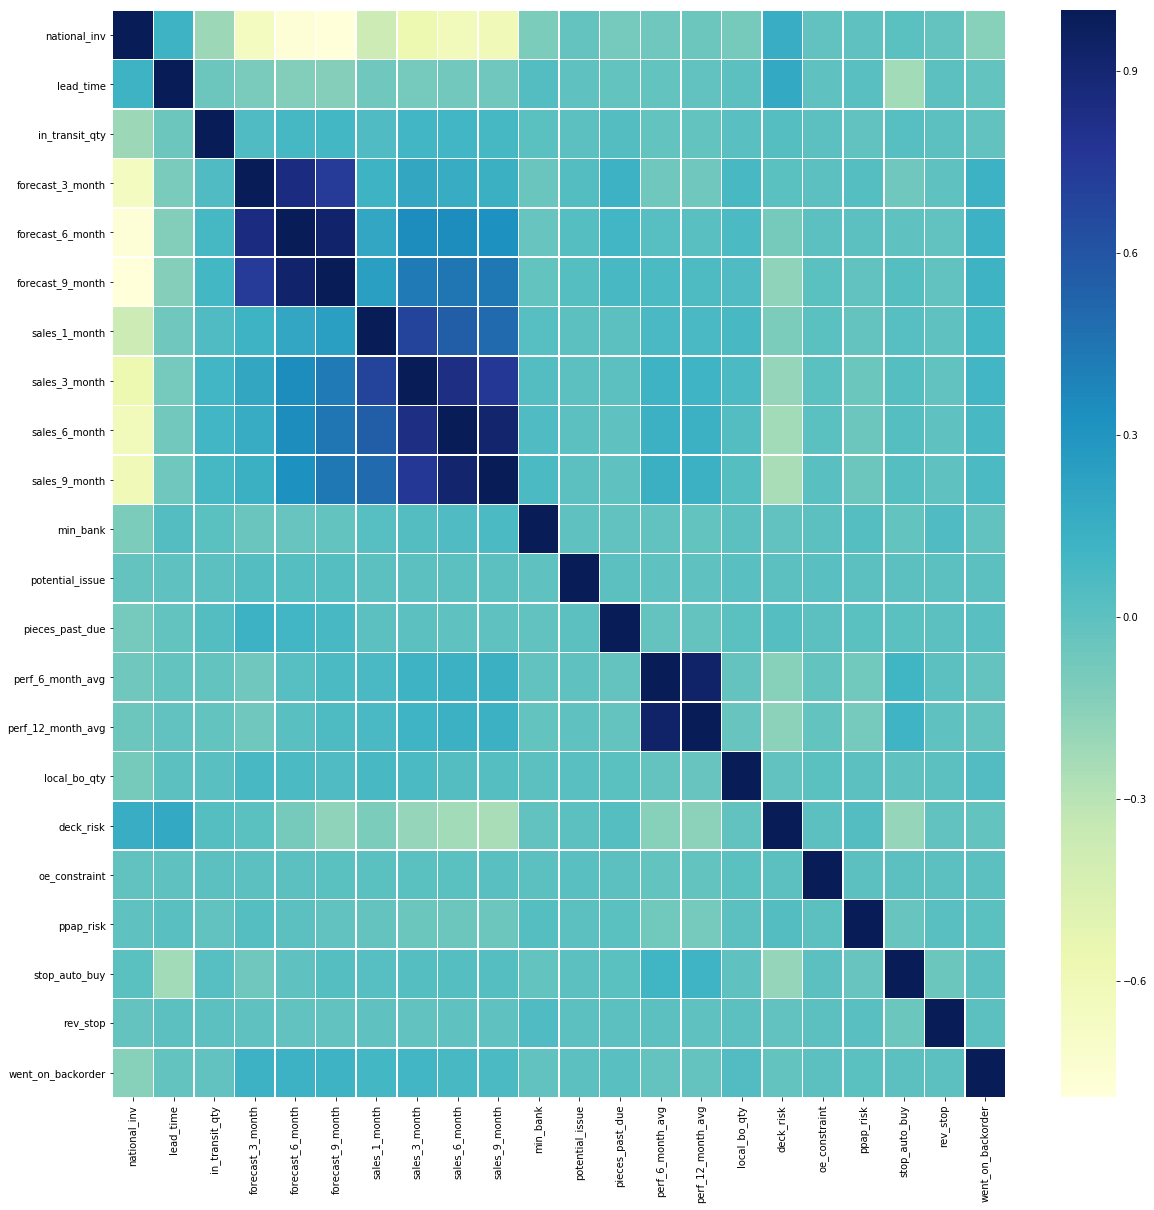

In [7]:
# Analisando correlações (relembrando)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(col_corr, annot=False, linewidths=.5, cmap="YlGnBu")

### Nota: Sobre o HeatMap acima, as Features muito correlacionadas terão notas altas em Features_Importance ao final ?

In [8]:
# Analisando: "perf_6_month_avg"' e "perf_12_month_avg"

perf_correlation_dataframe = data_frame[['perf_6_month_avg','perf_12_month_avg']]
perf_correlation = perf_correlation_dataframe.corr()
perf_correlation

,perf_6_month_avg,perf_12_month_avg
perf_6_month_avg,1.000000,0.933088
perf_12_month_avg,0.933088,1.000000


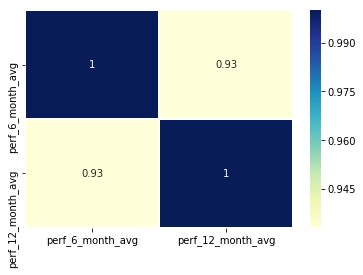

In [9]:
# Analisando: "perf_6_month_avg" e "perf_12_month_avg"

sns.heatmap(perf_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

/home/joaoluiz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/joaoluiz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


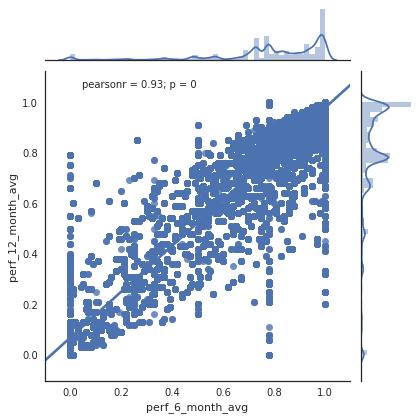

In [10]:
# Analisando: "perf_6_month_avg" e "perf_12_month_avg"

# https://seaborn.pydata.org/generated/seaborn.jointplot.html
sns.set(style="white", color_codes=True)
sns.jointplot('perf_6_month_avg', 'perf_12_month_avg', data=data_frame, kind='reg')

### Nota: "perf_6_month_avg" e "perf_12_month_avg" - Features muito relacionadas.

In [11]:
# Analisando: "sales_1_month", "sales_3_month", "sales_6_month" e "sales_9_month"

sales_correlation_dataframe = data_frame[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']]
sales_correlation = sales_correlation_dataframe.corr()
sales_correlation

,sales_1_month,sales_3_month,sales_6_month,sales_9_month
sales_1_month,1.000000,0.690962,0.556674,0.500372
sales_3_month,0.690962,1.000000,0.833968,0.759616
sales_6_month,0.556674,0.833968,1.000000,0.922808
sales_9_month,0.500372,0.759616,0.922808,1.000000


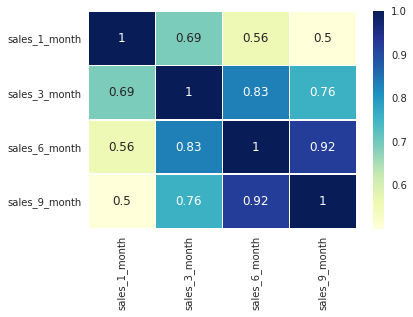

In [12]:
# Analisando: "sales_1_month", "sales_3_month", "sales_6_month" e "sales_9_month"

sns.heatmap(sales_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

### Nota: "sales_3_month", "sales_6_month" e "sales_9_month" apresentam forte correlação, diferentemente de "sales_1_month".

In [13]:
# Analisando: "forecast_3_month", "forecast_6_month" e "forecast_9_month"

forecast_correlation_dataframe = data_frame[['forecast_3_month','forecast_6_month','forecast_9_month']]
forecast_correlation = forecast_correlation_dataframe.corr()
forecast_correlation

,forecast_3_month,forecast_6_month,forecast_9_month
forecast_3_month,1.000000,0.851265,0.737747
forecast_6_month,0.851265,1.000000,0.925730
forecast_9_month,0.737747,0.925730,1.000000


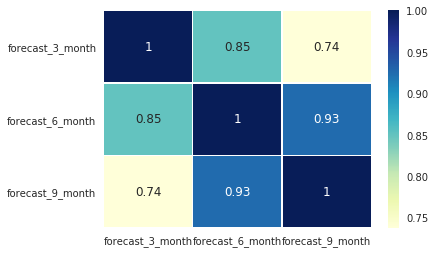

In [14]:
# Analisando: "forecast_3_month", "forecast_6_month" e "forecast_9_month"

sns.heatmap(forecast_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

### Nota: "forecast_3_month", "forecast_6_month" e "forecast_9_month" apresentam forte correlação.

(array([6.98700e+04, 1.33578e+05, 3.22530e+04, 1.92300e+03, 6.20000e+01,
        7.10000e+01, 5.00000e+00, 8.00000e+00, 0.00000e+00, 4.30500e+03]),
 array([ 0. ,  5.2, 10.4, 15.6, 20.8, 26. , 31.2, 36.4, 41.6, 46.8, 52. ]),
 <a list of 10 Patch objects>)

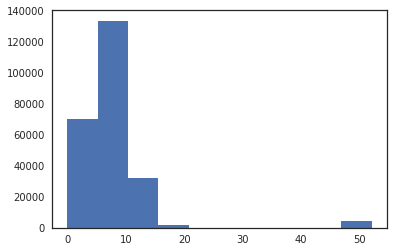

In [15]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor)

plt.hist(data_frame.lead_time)

### Nota: quase a totalitade dos produtos tem um tempo de entrega entre 1 e 15 dias por parte do fornecedor.

(array([5.00000e+00, 1.00000e+00, 4.00000e+00, 4.90000e+01, 7.07000e+02,
        5.21560e+04, 3.07420e+04, 1.79030e+04, 1.63040e+04, 1.24204e+05]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

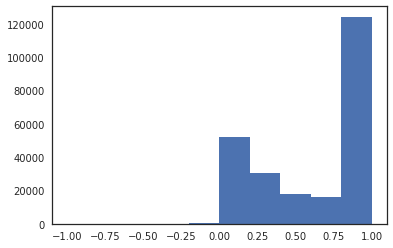

In [16]:
# Analisando: "national_inv" (estoque atual)

plt.hist(data_frame.national_inv)

(array([204927.,  21398.,   5707.,   3614.,   2816.,    907.,    322.,
          1292.,    357.,    735.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

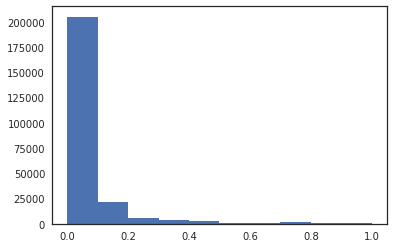

In [17]:
# Analisando: "min_bank" (quantidade de estoque mínima recomendada)

plt.hist(data_frame.min_bank)

In [18]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "national_inv" (estoque atual)

lead_time_national_inv_dataframe = data_frame[['lead_time','national_inv']]
lead_time_national_inv_correlation = lead_time_national_inv_dataframe.corr()
lead_time_national_inv_correlation

,lead_time,national_inv
lead_time,1.000000,0.122642
national_inv,0.122642,1.000000


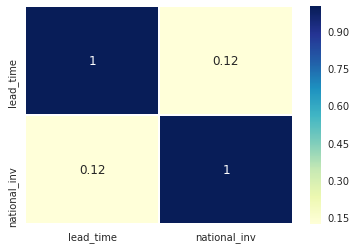

In [19]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "national_inv" (estoque atual)

sns.heatmap(lead_time_national_inv_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

Text(0,0.5,'estoque atual')

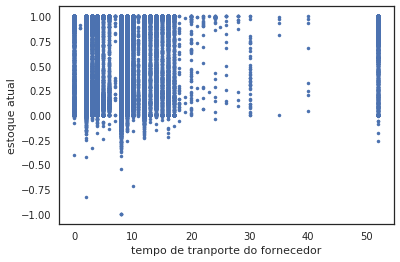

In [20]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "national_inv" (estoque atual)

plt.plot(data_frame.lead_time, data_frame.national_inv, marker='.', linestyle='None')
plt.xlabel('tempo de tranporte do fornecedor')
plt.ylabel('estoque atual')

In [21]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "min_bank" (quantidade de estoque mínima recomendada)

lead_time_min_bank_dataframe = data_frame[['lead_time','min_bank']]
lead_time_min_bank_correlation = lead_time_min_bank_dataframe.corr()
lead_time_min_bank_correlation

,lead_time,min_bank
lead_time,1.000000,0.037051
min_bank,0.037051,1.000000


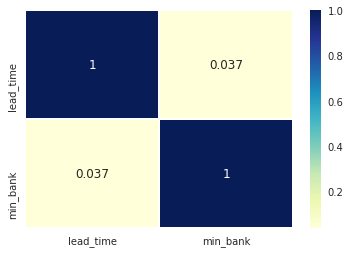

In [22]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "min_bank" (quantidade de estoque mínima recomendada)

sns.heatmap(lead_time_min_bank_correlation, annot=True, linewidths=.5, cmap="YlGnBu")

Text(0,0.5,'quantidade de estoque mínima recomendada')

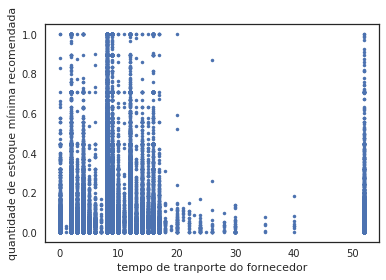

In [23]:
# Analisando: "lead_time" (tempo de tranporte do fornecedor) versus "min_bank" (quantidade de estoque mínima recomendada)

plt.plot(data_frame.lead_time, data_frame.min_bank, marker='.', linestyle='None')
plt.xlabel('tempo de tranporte do fornecedor')
plt.ylabel('quantidade de estoque mínima recomendada')

Text(0,0.5,'Quantidade de Estoque Mínima Recomendada')

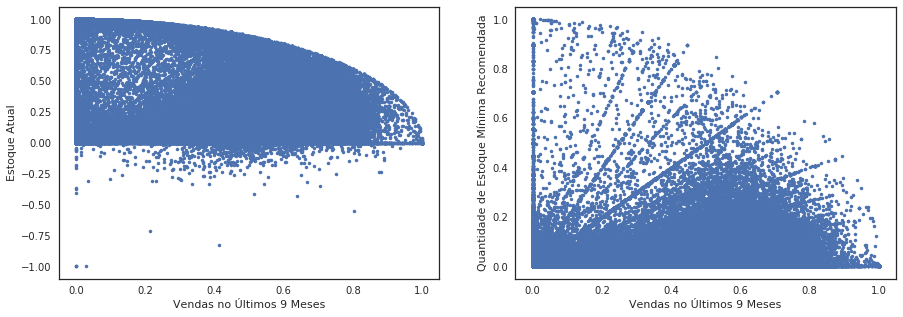

In [24]:
# Analisando: "sales_9_month" (Vendas no Últimos 9 Meses) versus "national_inv" (Estoque Atual)
# Analisando: "sales_9_month" (Vendas no Últimos 9 Meses) versus "min_bank" (quantidade de estoque mínima recomendada)

#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
fig , ax = plt.subplots(ncols=2, figsize=(15,5))

plt.subplot(121)
plt.plot(data_frame.sales_9_month, df.national_inv, marker='.', linestyle='None')
plt.xlabel('Vendas no Últimos 9 Meses')
plt.ylabel('Estoque Atual')

plt.subplot(122)
plt.plot(data_frame.sales_9_month, df.min_bank, marker='.', linestyle='None')
plt.xlabel('Vendas no Últimos 9 Meses')
plt.ylabel('Quantidade de Estoque Mínima Recomendada')

#### Analisando: "Part risk flag" versus "went_on_backorder"

- deck_risk - Part risk flag (indicativo de risco)
- oe_constraint - Part risk flag (indicativo de risco)
- ppap_risk - Part risk flag (indicativo de risco)
- stop_auto_buy - Part risk flag (indicativo de risco)
- rev_stop - Part risk flag (indicativo de risco)

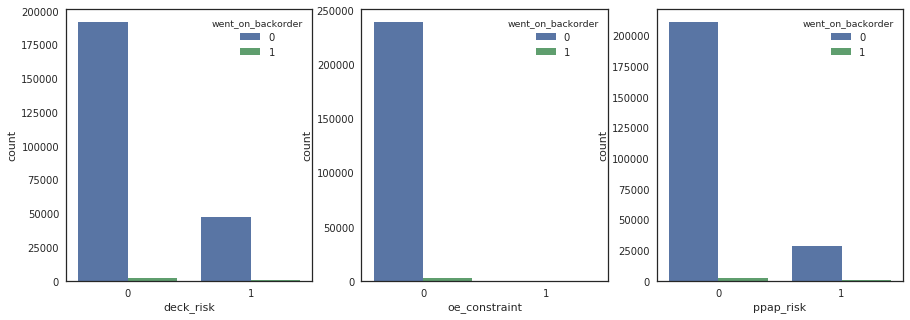

In [25]:
# Analisando: "Part risk flag" versus "went_on_backorder"

# https://seaborn.pydata.org/generated/seaborn.countplot.html

fig , ax = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot('deck_risk', hue='went_on_backorder', data=data_frame, ax=ax[0])
sns.countplot('oe_constraint',hue='went_on_backorder', data=data_frame, ax=ax[1])
sns.countplot('ppap_risk', hue='went_on_backorder', data=data_frame, ax=ax[2])

#### Nota: Existe uma relação entre "deck_risk" e "ppap_risk" com "went_on_backorder" (Target). Deverá ser melhor estudada.

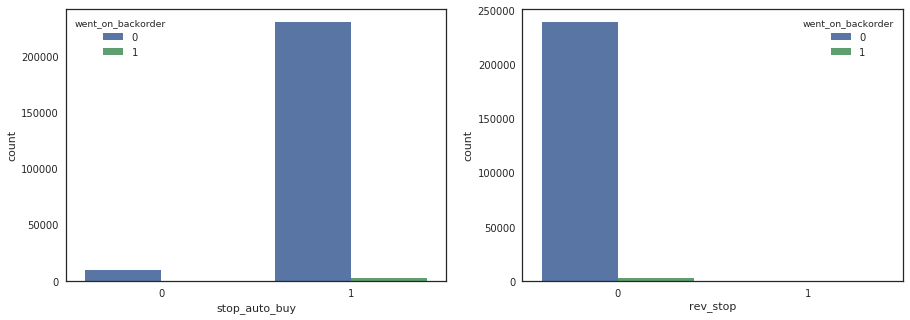

In [26]:
# Analisando: "Part risk flag" versus "went_on_backorder"

# https://seaborn.pydata.org/generated/seaborn.countplot.html

fig , ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot('stop_auto_buy',hue='went_on_backorder', data=data_frame, ax=ax[0])
sns.countplot('rev_stop',hue='went_on_backorder', data=data_frame, ax=ax[1])

#### Nota: Embora relativamente discreta, existe uma relação entre "ligar ou desligar" a Feature "stop_auto_buy" (paralisar compra automática?) e  "went_on_backorder" (Target). 
- Paralisar Compra Automática ("stop_auto_buy" = 1 (SIM)) => Gera BackOrder
- Ligar Compra Automática ("stop_auto_buy"  = 0 (NÃO)) => Não gera BackOrder

### Fim -> "Etapa 02: Análise mais detalhada de Features"
#### Exploratory Data Analysis (EDA) / Análise Exploratória de Dados (AED)